In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/HP/Desktop/Imarticus Learning/Projects/Vehicle performance prediction/data.csv")

In [3]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
data = df.copy(deep = True)

In [5]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
data.shape

(398, 9)

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64


In [9]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [10]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [36]:
data = data[data.horsepower != '?']
'?' in data.horsepower
data.shape

(392, 9)

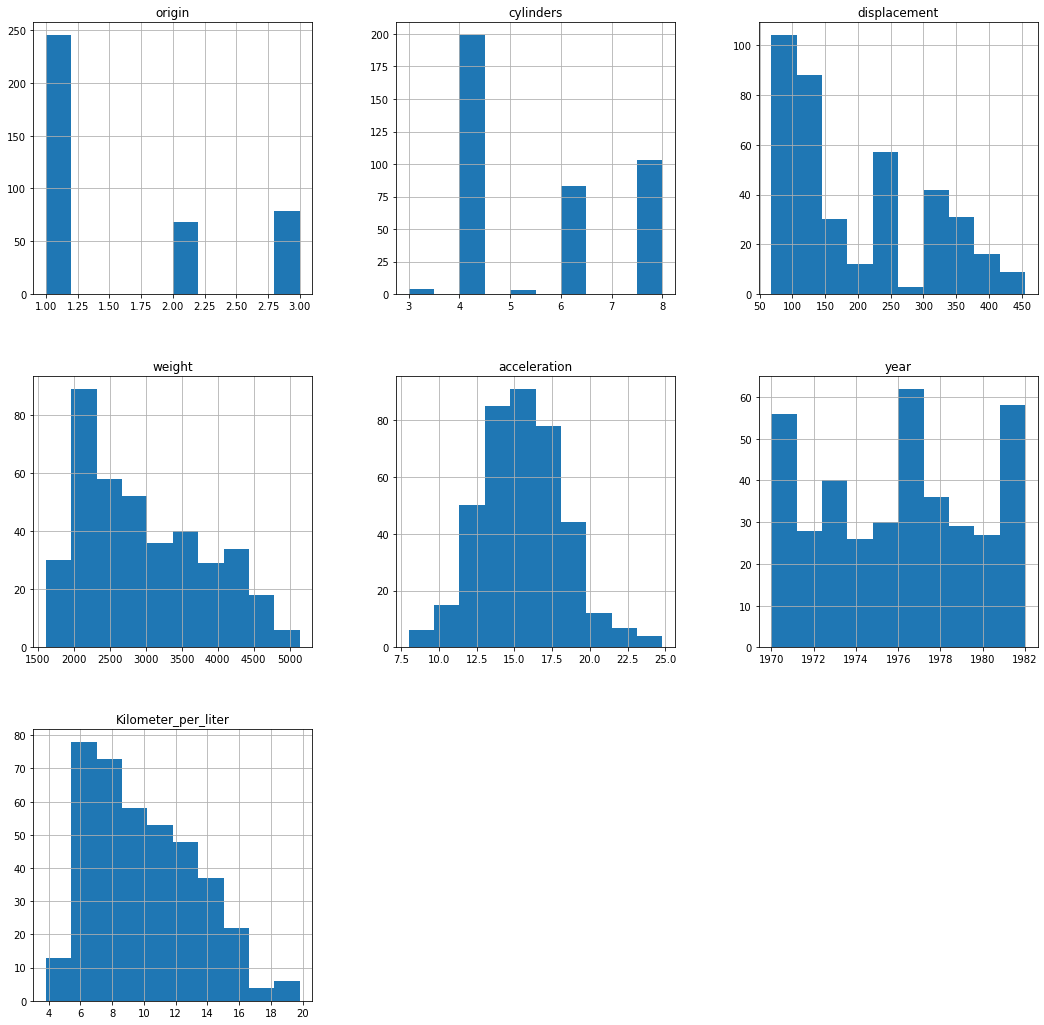

In [37]:
fig = data.hist(figsize = (18,18))

In [38]:
data.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

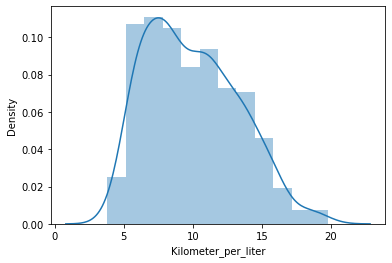

In [39]:
sns.distplot(data.Kilometer_per_liter)

In [40]:
data_2 = data.copy(deep = True)
data_2['log_mileage'] = np.log(data_2.Kilometer_per_liter)
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,log_mileage
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587,2.035044
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156,1.852722
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587,2.035044
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299,1.917261
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443,1.977885


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

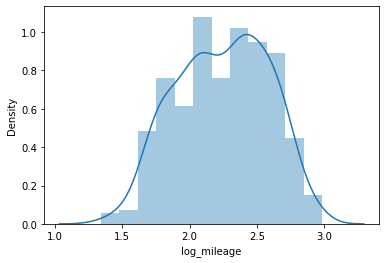

In [41]:
sns.distplot(data_2.log_mileage)

In [42]:
data_3 = data_2.copy(deep = True)

In [43]:
data_3.cylinders = data_3.cylinders.astype('object')

In [44]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    object 
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
 9   log_mileage          392 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 41.8+ KB


In [45]:
data.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

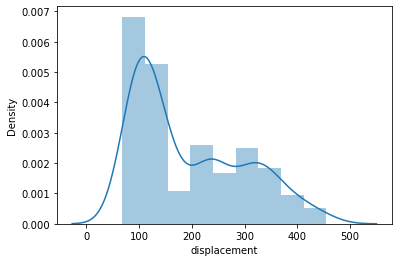

In [46]:
sns.distplot(data.displacement)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


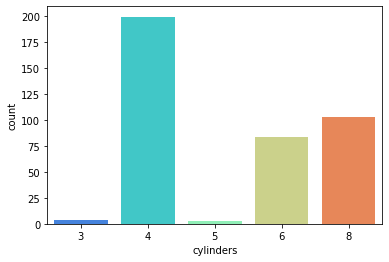

In [47]:
sns.countplot(data.cylinders,data=data,palette = "rainbow")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


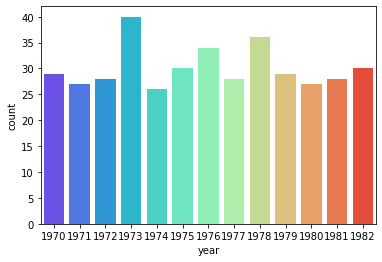

In [48]:
sns.countplot(data_3['year'],palette = "rainbow")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


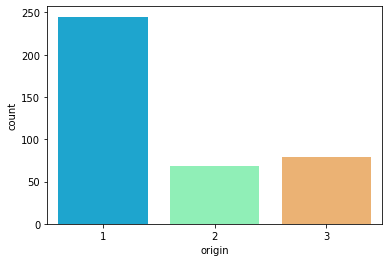

In [49]:
sns.countplot(data_3.origin,palette = "rainbow")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

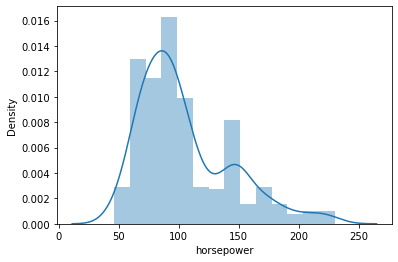

In [50]:
sns.distplot(data_3.horsepower)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

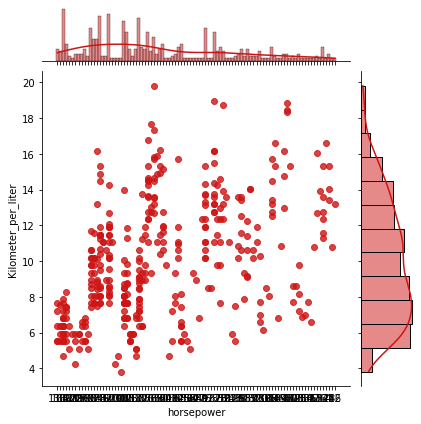

In [53]:
x = data_3[['Kilometer_per_liter','horsepower']]
sns.jointplot(x.loc[:,'horsepower'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


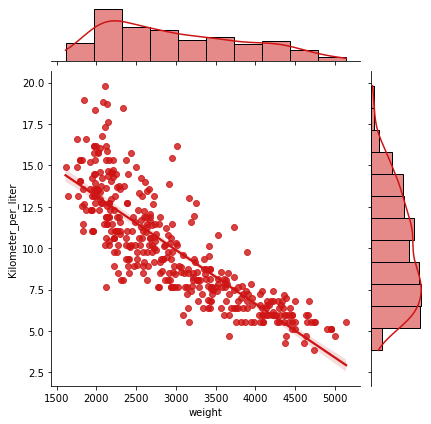

In [54]:
x = data[['Kilometer_per_liter','weight']]
sns.jointplot(x.loc[:,'weight'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


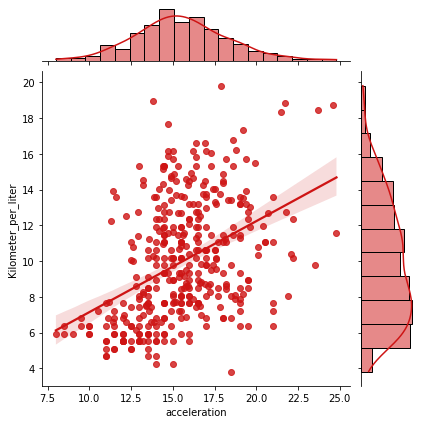

In [55]:
x = data[['Kilometer_per_liter','acceleration']]
sns.jointplot(x.loc[:,'acceleration'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


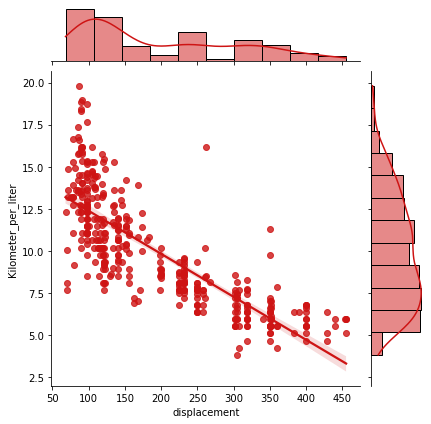

In [56]:
x = data[['Kilometer_per_liter','displacement']]
sns.jointplot(x.loc[:,'displacement'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")


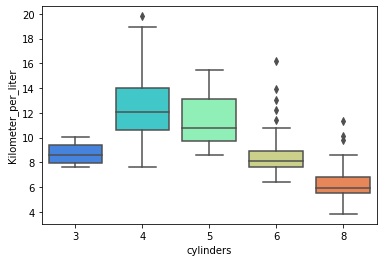

In [57]:
sns.boxplot(y='Kilometer_per_liter',x='cylinders',data=data,palette = "rainbow")
plt.show()

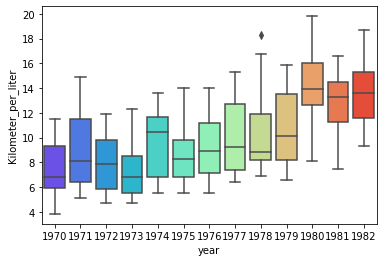

In [58]:
sns.boxplot(y='Kilometer_per_liter',x='year',data=data,palette = "rainbow")
plt.show()

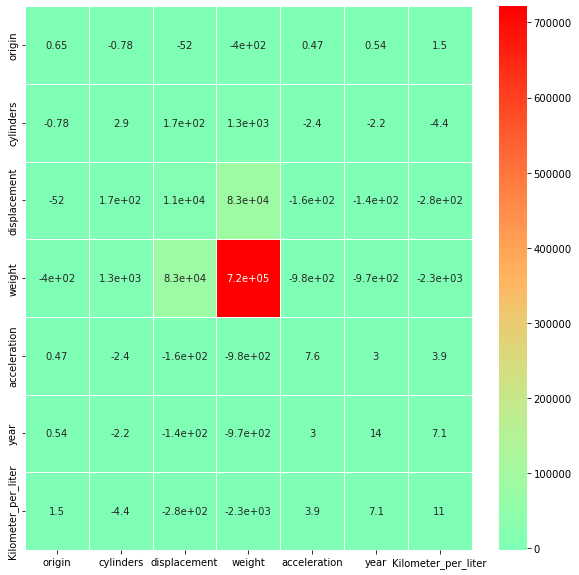

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(data.cov(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()


In [60]:
# check correlation
data_num = data_3.drop(['Kilometer_per_liter','log_mileage','origin'],axis = 1)
corr = data_num.corr()
corr

,displacement,weight,acceleration,year
displacement,1.000000,0.932994,-0.543800,-0.369855
weight,0.932994,1.000000,-0.416839,-0.309120
acceleration,-0.543800,-0.416839,1.000000,0.290316
year,-0.369855,-0.309120,0.290316,1.000000


<AxesSubplot:>

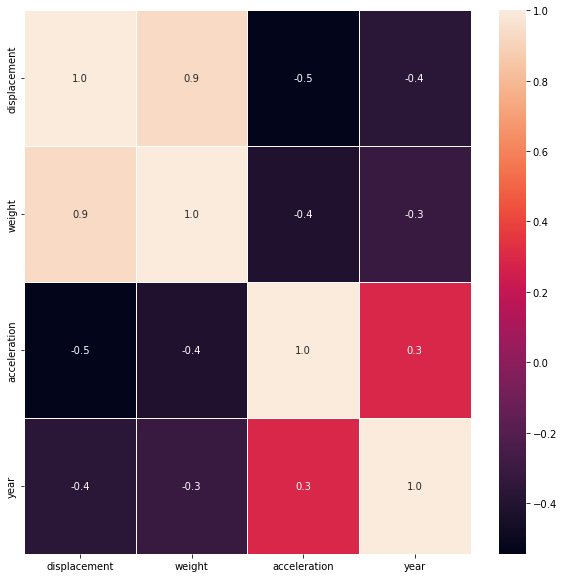

In [61]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [62]:
drop_list = ['weight','displacement']
data_cleaned = data.drop(drop_list,axis = 1 )        
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,name,Kilometer_per_liter
0,1,8,130,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,165,11.5,1970,buick skylark 320,6.377156
2,1,8,150,11.0,1970,plymouth satellite,7.652587
3,1,8,150,12.0,1970,amc rebel sst,6.802299
4,1,8,140,10.5,1970,ford torino,7.227443


In [63]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   horsepower           392 non-null    object 
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   name                 392 non-null    object 
 6   Kilometer_per_liter  392 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 32.6+ KB


In [64]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies.head()

,origin,cylinders,acceleration,year,Kilometer_per_liter,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,1,8,12.0,1970,7.652587,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,11.5,1970,6.377156,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8,11.0,1970,7.652587,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8,12.0,1970,6.802299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8,10.5,1970,7.227443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.preprocessing import MinMaxScaler
x = data_with_dummies.drop(['Kilometer_per_liter'],axis = 1)

In [69]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [70]:
X = scaler.fit_transform(x)

In [71]:
y = data_with_dummies.Kilometer_per_liter

In [72]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (313, 396)
X_test  (79, 396)
y_train  (313,)
y_test  (79,)


In [73]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(alpha=0.1, loss='squared_loss')

In [74]:
# predict the values
y_pred_SGD  = SGD_model.predict(X_test)

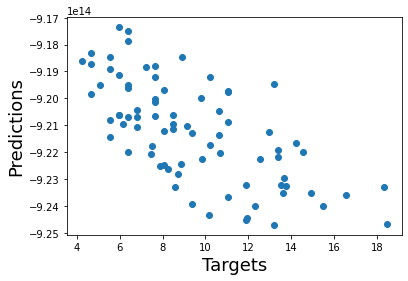

In [75]:
plt.scatter(y_test,y_pred_SGD)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [76]:
# compute the R-Squared
r_squared_SGD = SGD_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_SGD))
print(rmse_SGD)


921238002131562.5
